Confusion matrix
[[131  10]
 [ 26 232]]


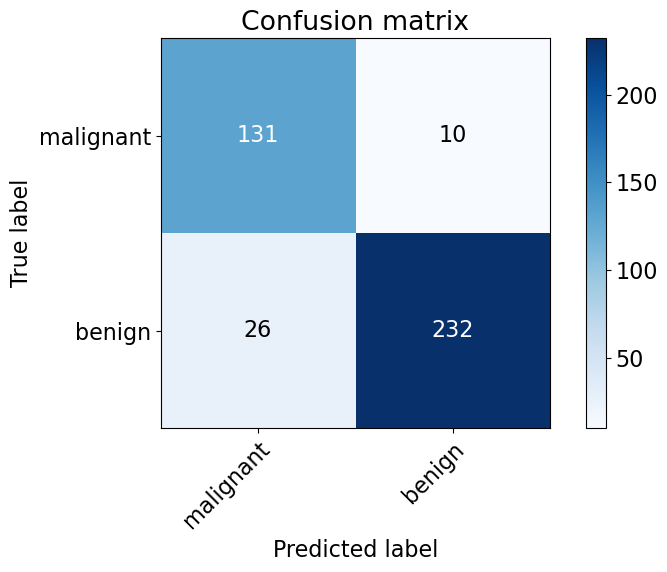

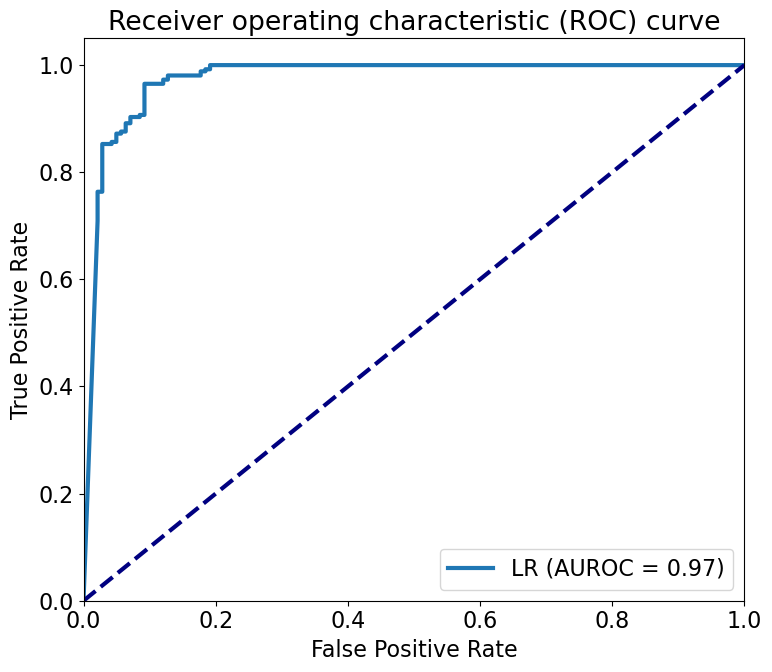

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Matplolib defaults
figsize = (8,6)
fontsize = 20
markersize = 12
linewidth = 2
dpi = 300
plt.rcParams.update({'figure.autolayout': True})

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(title)
    else:
        print(title)

    print(cm)

    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=figsize)    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            
    fig.tight_layout()
    
    return ax

np.random.seed(12345)

x, y = datasets.load_breast_cancer(return_X_y=True); label_names = datasets.load_breast_cancer()['target_names']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression(penalty=None).fit(x_train, y_train)
class_pred = model.predict(x_test)
prob_pred = model.predict_proba(x_test)[:,1]

plot_confusion_matrix(y_test, y_pred=class_pred, classes=label_names, title="Confusion matrix")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_pred)
plt.figure(figsize=(8,7))
plt.plot(fpr, tpr, lw=3, label=f"LR (AUROC = {metrics.auc(fpr, tpr):0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()